In [58]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv(r"C:\Users\Maiara\Downloads\data_educacao\microdados_ed_basica_2020.CSV", sep=';', encoding='iso-8859-1')

# Verificando limpeza

In [60]:
df.duplicated().sum() # sem duplicados

0

In [61]:
df_educacao2020 = df[df['TP_DEPENDENCIA'] != 4] [['NO_REGIAO','CO_REGIAO','IN_AGUA_INEXISTENTE','IN_ESGOTO_INEXISTENTE','IN_ENERGIA_INEXISTENTE','IN_BANHEIRO_DENTRO_PREDIO','IN_BIBLIOTECA','IN_LABORATORIO_CIENCIAS','IN_LABORATORIO_INFORMATICA','IN_PATIO_COBERTO','IN_QUADRA_ESPORTES','IN_REFEITORIO','IN_SALA_ATELIE_ARTES','IN_SALA_PROFESSOR','IN_ALIMENTACAO']]
df_educacao2020

,NO_REGIAO,CO_REGIAO,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_BANHEIRO_DENTRO_PREDIO,IN_BIBLIOTECA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PATIO_COBERTO,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_PROFESSOR,IN_ALIMENTACAO
0,Norte,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,Norte,1,0,0,0,0,1,1,1,1,1,1,0,1,1
2,Norte,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Norte,1,0,0,0,0,1,0,0,1,1,1,0,1,1
4,Norte,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224207,Centro-Oeste,5,0,0,0,0,0,0,0,0,1,1,0,1,1
224208,Centro-Oeste,5,0,0,0,0,0,0,1,1,0,0,0,1,1
224209,Centro-Oeste,5,0,0,0,0,0,0,0,1,1,0,1,1,1
224210,Centro-Oeste,5,0,0,0,0,0,0,0,0,0,0,0,1,1


In [62]:
df_educacao2020[df_educacao2020.isnull().any(axis=1)] # sem valores nulos nas colunas que usaremos

,NO_REGIAO,CO_REGIAO,IN_AGUA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_BANHEIRO_DENTRO_PREDIO,IN_BIBLIOTECA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PATIO_COBERTO,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_PROFESSOR,IN_ALIMENTACAO


Distribuição de recursos no ensino por regiao nas escolas publicas (TP_DEPENDENCIA != 4)

#### Variáveis para serem exploradas:

* NO_REGIAO
* CO_REGIAO
* TP_DEPENDENCIA
* IN_AGUA_INEXISTENTE - Abastecimento de água - Não há abastecimento de água
* IN_ESGOTO_INEXISTENTE - Esgoto sanitário - Não há esgotamento sanitário
* IN_ENERGIA_INEXISTENTE - Abastecimento de energia elétrica - Não há energia elétrica
* IN_BANHEIRO_DENTRO_PREDIO - Dependências físicas existentes e utilizadas na escola - Banheiro dentro do prédio
* IN_BIBLIOTECA - Dependências físicas existentes e utilizadas na escola - Biblioteca
* IN_LABORATORIO_CIENCIAS - Dependências físicas existentes e utilizadas na escola - Laboratório de ciências
* IN_LABORATORIO_INFORMATICA - Dependências físicas existentes e utilizadas na escola - Laboratório de informática
* IN_PATIO_COBERTO - Dependências físicas existentes e utilizadas na escola - Pátio Coberto
* IN_QUADRA_ESPORTES - Dependências físicas existentes e utilizadas na escola - Quadra de esportes coberta ou descoberta
* IN_REFEITORIO - Dependências físicas existentes e utilizadas na escola - Refeitório
* IN_SALA_ATELIE_ARTES - Dependências físicas existentes e utilizadas na escola - Sala/ateliê de artes
* IN_SALA_PROFESSOR - Dependências físicas existentes e utilizadas na escola - Sala de professores
* IN_ALIMENTACAO - Alimentação escolar para os alunos - PNAE/FNDE
* QT_MAT_BAS - Número de Matrículas na Educação Básica
* QT_MAT_INF - Número de Matrículas na Educação Infantil
* QT_MAT_FUND - Número de Matrículas no Ensino Fundamental
* QT_MAT_MED - Número de Matrículas no Ensino Médio
* QT_DOC_BAS - Número de Docentes da Educação Básica
* QT_DOC_INF - Número de Docentes da Educação Infantil
* QT_DOC_FUND - Número de Docentes do Ensino Fundamental
* QT_DOC_MED - Número de Docentes do Ensino Médio
* QT_MAT_BAS_18_MAIS - Número de Matrículas na Educação Básica - Com 18 ou mais anos de idade
* QT_MAT_BAS_BRANCA - Número de Matrículas na Educação Básica - Cor/Raça Branca
* QT_MAT_BAS_PRETA - Número de Matrículas na Educação Básica - Cor/Raça Preta

# Análise Exploratória

In [65]:
df_educacao2020['NO_REGIAO'].value_counts()

NO_REGIAO
Nordeste        67895
Sudeste         49628
Norte           24372
Sul             22020
Centro-Oeste     8490
Name: count, dtype: int64

Text(0, 0.5, 'Possui alguma fonte de agua')

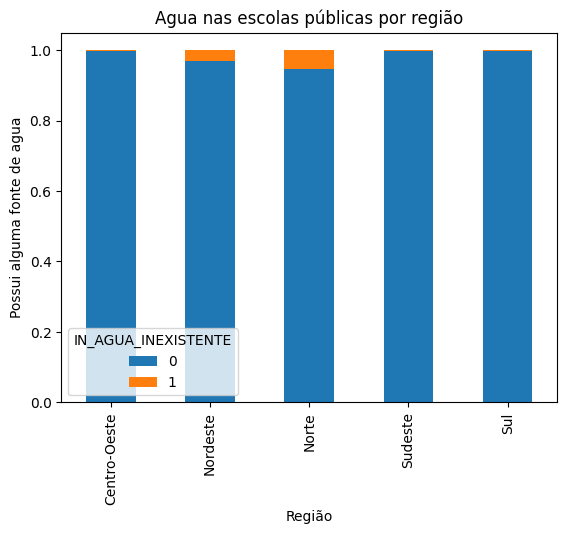

In [64]:
table= pd.crosstab(df_educacao2020.NO_REGIAO,df_educacao2020.IN_AGUA_INEXISTENTE)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Agua nas escolas públicas por região')
plt.xlabel('Região')
plt.ylabel('Possui alguma fonte de agua')

Text(0, 0.5, 'Possui alguma fonte de energia')

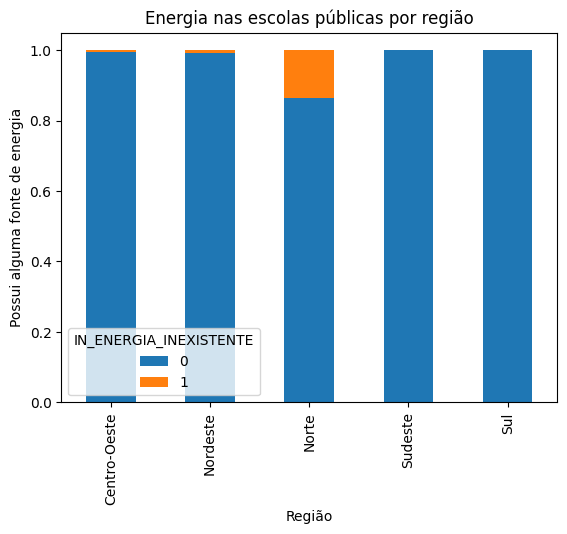

In [66]:
table= pd.crosstab(df_educacao2020.NO_REGIAO,df_educacao2020.IN_ENERGIA_INEXISTENTE)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Energia nas escolas públicas por região')
plt.xlabel('Região')
plt.ylabel('Possui alguma fonte de energia')

Text(0, 0.5, 'Possui tratamento de esgoto')

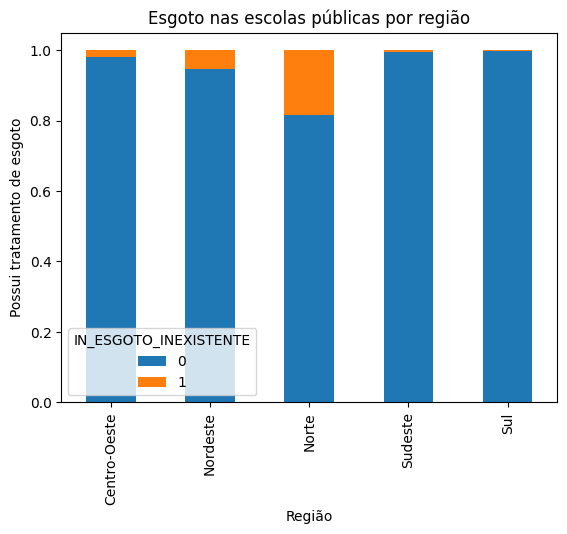

In [67]:
table= pd.crosstab(df_educacao2020.NO_REGIAO,df_educacao2020.IN_ESGOTO_INEXISTENTE)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Esgoto nas escolas públicas por região')
plt.xlabel('Região')
plt.ylabel('Possui tratamento de esgoto')

* Uma quantidade considerável de escolas na região do norte carece de recursos básicos

Text(0, 0.5, 'Oferece alimentação')

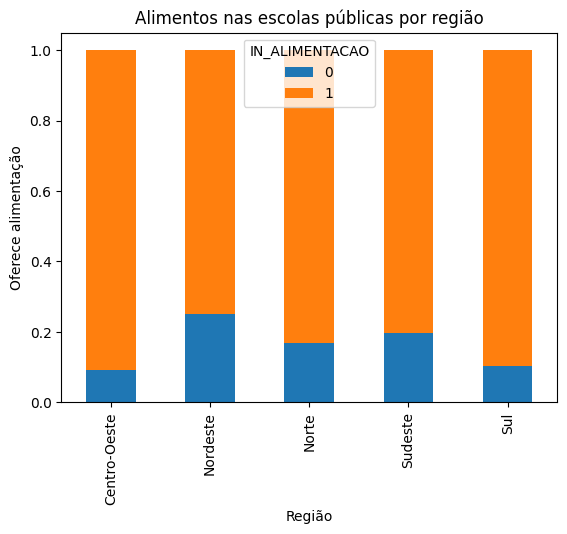

In [68]:
table= pd.crosstab(df_educacao2020.NO_REGIAO,df_educacao2020.IN_ALIMENTACAO)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Alimentos nas escolas públicas por região')
plt.xlabel('Região')
plt.ylabel('Oferece alimentação')

* A falta de alimento é presente nas escolas de todas as regiões do Brasil

Text(0, 0.5, 'Oferece patio coberto')

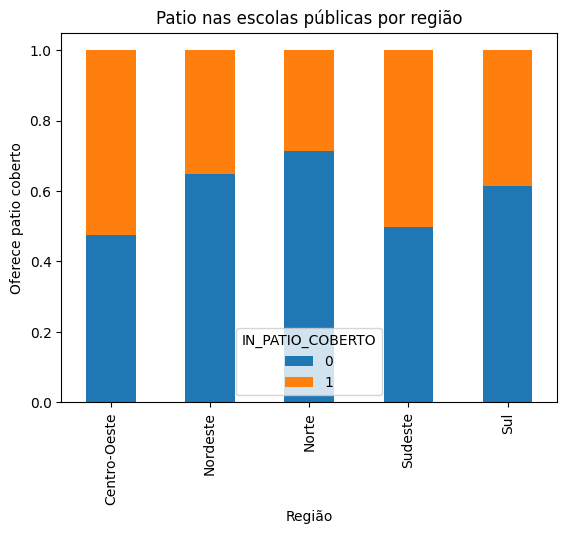

In [69]:
table= pd.crosstab(df_educacao2020.NO_REGIAO,df_educacao2020.IN_PATIO_COBERTO)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Patio nas escolas públicas por região')
plt.xlabel('Região')
plt.ylabel('Oferece patio coberto')

Text(0, 0.5, 'Oferece')

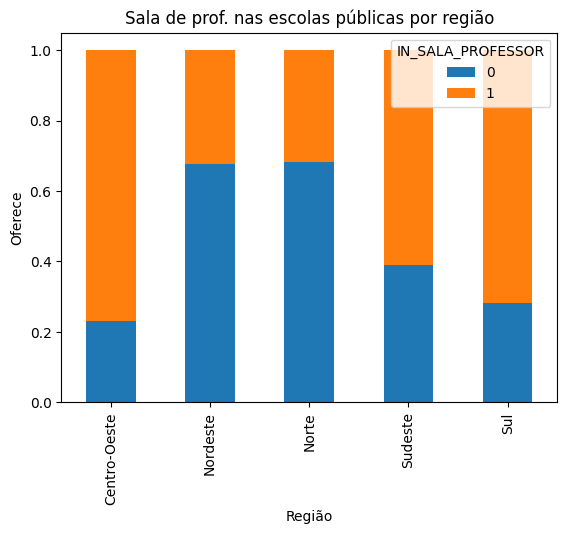

In [70]:
table= pd.crosstab(df_educacao2020.NO_REGIAO,df_educacao2020.IN_SALA_PROFESSOR)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sala de prof. nas escolas públicas por região')
plt.xlabel('Região')
plt.ylabel('Oferece')

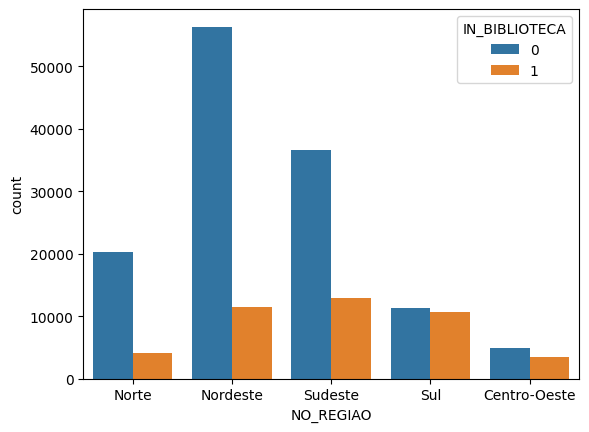

In [71]:
sns.countplot(x='NO_REGIAO', hue='IN_BIBLIOTECA', data=df_educacao2020)
plt.show()

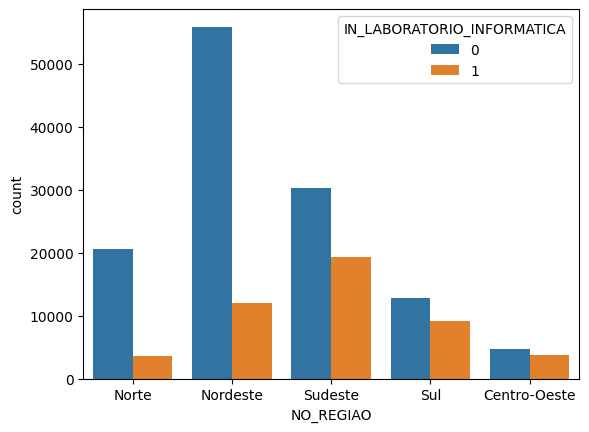

In [72]:
sns.countplot(x='NO_REGIAO', hue='IN_LABORATORIO_INFORMATICA', data=df_educacao2020)
plt.show()

* As escolas públicas do Centro-Oeste e Sul estão muito bem equipadas ecnologicamente, enquanto a região sudeste está razoavelmente equipada e a região Norte e Nordeste novamente sofrem com falta de recursos importantes

# Estrutura por região

In [21]:
df2_educacao2020 = df[df['TP_DEPENDENCIA'] != 4] [['NO_REGIAO','IN_BIBLIOTECA','IN_LABORATORIO_CIENCIAS','IN_LABORATORIO_INFORMATICA','IN_QUADRA_ESPORTES','IN_REFEITORIO','IN_SALA_ATELIE_ARTES','IN_SALA_PROFESSOR']]
df2_educacao2020

,NO_REGIAO,IN_BIBLIOTECA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_PROFESSOR
0,Norte,0,0,0,0,0,0,0
1,Norte,1,1,1,1,1,0,1
2,Norte,0,0,0,0,0,0,0
3,Norte,1,0,0,1,1,0,1
4,Norte,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
224207,Centro-Oeste,0,0,0,1,1,0,1
224208,Centro-Oeste,0,0,1,0,0,0,1
224209,Centro-Oeste,0,0,0,1,0,1,1
224210,Centro-Oeste,0,0,0,0,0,0,1


In [34]:
df2_educacao2020['Estruturada'] = 0

# Lista das variáveis que devem ser iguais a 1 para ser considerada "Estruturada"
variaveis_estruturadas = ['IN_BIBLIOTECA','IN_LABORATORIO_CIENCIAS','IN_LABORATORIO_INFORMATICA','IN_QUADRA_ESPORTES','IN_REFEITORIO','IN_SALA_PROFESSOR']

# Itera sobre as linhas do DataFrame
for index, row in df2_educacao2020.iterrows():
    # Conta o número de variáveis iguais a 1 em cada linha
    count_ones = sum(row[variaveis_estruturadas] == 1)
    
    # Se 6 ou mais variáveis forem iguais a 1, marque como "Estruturada"
    if count_ones >= 3:
        df2_educacao2020.at[index, 'Estruturada'] = 1

# Se alguma instância do DataFrame for do tipo 'object', você pode precisar converter as variáveis relevantes para int
df2_educacao2020[variaveis_estruturadas] = df2_educacao2020[variaveis_estruturadas].astype(int)

# Exiba o DataFrame resultante
df2_educacao2020

,NO_REGIAO,IN_BIBLIOTECA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_QUADRA_ESPORTES,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_PROFESSOR,Estruturada
0,Norte,0,0,0,0,0,0,0,0
1,Norte,1,1,1,1,1,0,1,1
2,Norte,0,0,0,0,0,0,0,0
3,Norte,1,0,0,1,1,0,1,1
4,Norte,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
224207,Centro-Oeste,0,0,0,1,1,0,1,1
224208,Centro-Oeste,0,0,1,0,0,0,1,0
224209,Centro-Oeste,0,0,0,1,0,1,1,0
224210,Centro-Oeste,0,0,0,0,0,0,1,0


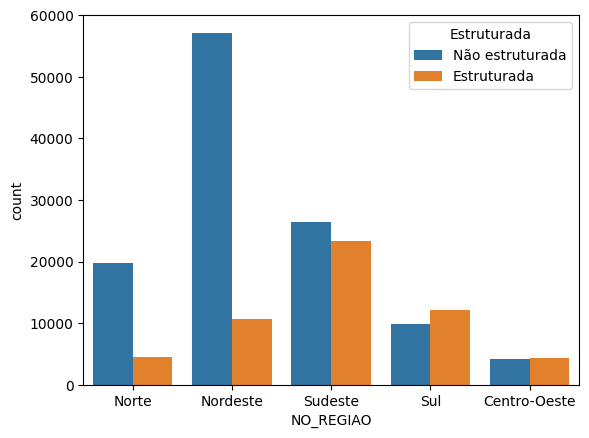

In [25]:
sns.countplot(x='NO_REGIAO', hue='Estruturada', data=df2_educacao2020)
plt.show()

* É possível notar que as regiões do norte e nordeste são muito afetadas com a falta de recursos.
* A região centro-oeste é a menos afetada, seguida do sul e suldeste

# Comparação performance

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [48]:
df3_educacao2020 = df[df['TP_DEPENDENCIA'] != 4] [['NO_REGIAO','QT_MAT_BAS_PRETA','QT_MAT_BAS_BRANCA','QT_MAT_BAS_18_MAIS','QT_DOC_MED','QT_DOC_FUND','QT_DOC_INF','QT_DOC_BAS','QT_MAT_MED','QT_MAT_FUND','QT_MAT_FUND','QT_MAT_INF','QT_MAT_BAS']]
df3_educacao2020

,NO_REGIAO,QT_MAT_BAS_PRETA,QT_MAT_BAS_BRANCA,QT_MAT_BAS_18_MAIS,QT_DOC_MED,QT_DOC_FUND,QT_DOC_INF,QT_DOC_BAS,QT_MAT_MED,QT_MAT_FUND,QT_MAT_FUND,QT_MAT_INF,QT_MAT_BAS
0,Norte,0,0,0,0,1,0,1,0,6,6,0,6
1,Norte,12,67,220,0,0,0,18,0,0,0,0,251
2,Norte,0,7,0,0,1,0,1,0,17,17,0,17
3,Norte,6,13,0,0,8,1,8,0,105,105,8,113
4,Norte,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224207,Centro-Oeste,15,52,1,0,17,5,22,0,422,422,119,541
224208,Centro-Oeste,52,91,0,0,26,2,28,0,672,672,52,724
224209,Centro-Oeste,43,256,5,0,38,0,38,0,1145,1145,0,1145
224210,Centro-Oeste,17,66,0,0,20,0,20,0,539,539,0,539


In [51]:
X = df3_educacao2020.drop(['NO_REGIAO'], axis=1)
y = df3_educacao2020['NO_REGIAO']

In [52]:
X = (X - X.min()) / (X.max() - X.min())

### Random Forest

In [54]:
# divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=0)

random_forest = RandomForestClassifier(n_estimators = 20, random_state=42)
random_forest.fit(X_train, y_train)
y_pred  = random_forest.predict(X_test)

# verificando o report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Centro-Oeste       0.34      0.15      0.21      2555
    Nordeste       0.60      0.83      0.70     20281
       Norte       0.52      0.32      0.40      7180
     Sudeste       0.66      0.57      0.61     15064
         Sul       0.64      0.50      0.56      6642

    accuracy                           0.61     51722
   macro avg       0.55      0.47      0.49     51722
weighted avg       0.60      0.61      0.59     51722



### Multi Layer Perceptron

In [57]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(10,30,10), max_iter=50, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Centro-Oeste       0.19      0.01      0.02      2555
    Nordeste       0.56      0.90      0.69     20281
       Norte       0.48      0.13      0.21      7180
     Sudeste       0.67      0.51      0.58     15064
         Sul       0.63      0.52      0.57      6642

    accuracy                           0.59     51722
   macro avg       0.51      0.41      0.41     51722
weighted avg       0.57      0.59      0.54     51722



Em ambos os modelos analisadosé possível notar que:

* O modelo parece ter um desempenho razoável para as classes Nordeste, Sudeste e Sul, com precisões razoáveis e recalls razoáveis.
* Entretanto, para as classes Centro-Oeste e Norte, o desempenho é mais fraco, especialmente em termos de recall, indicando uma dificuldade do modelo em identificar corretamente exemplos dessas classes.
* A macro avg e weighted avg para recall são relativamente baixas, indicando um desafio geral em lidar com as classes menos representadas

Para melhorar o desempenho da classificação baseada nos dados disponíveis seria necessário um modelo mais complexo ou mais etapas de tratamento.